In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cmplt

import sys
sys.path.insert(0, '../../opticalforces')

from beam import VectorialFrozenWave
from particle import SphericalParticle

fig_num = 0

In [2]:
L = 50e-3

def lip_const_func(z):
    return 1 if abs(z) < 0.1*L else 0
    
vfw = VectorialFrozenWave(centered=True)
vfw.name = 'lip-const'
vfw.vacuum_wavelength = 1064e-9
vfw.medium_refractive_index = 1.33
vfw.N = 25
vfw.L = L
vfw.Q = 0.9994*vfw.wavenumber
vfw.reference_function = lip_const_func

/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


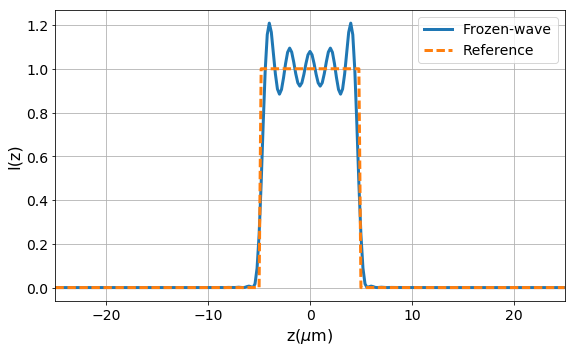

In [3]:
z = np.linspace(-L/2, L/2, 251)

fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

plt.plot([z*1e3 for z in z], [vfw.intensity(0, 0, z) for z in z], lw=3, label='Frozen-wave')
plt.plot([z*1e3 for z in z], [vfw.reference_function(z)**2 for z in z], '--', lw=3, label='Reference')
plt.legend(fontsize=12, loc=1)
plt.xlim([-L/2*1e3, L/2*1e3])
plt.legend(fontsize=14, loc=1)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel(r'z($\mu$m)', fontsize=16)
plt.ylabel('I(z)', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-const-perfil-2D.png')
plt.show()

1/64
start: 23 Jul 2017 17:12:42
time: 14.928610801696777

2/64
start: 23 Jul 2017 17:12:56
time: 8.69723391532898

3/64
start: 23 Jul 2017 17:13:05
time: 8.701715230941772

4/64
start: 23 Jul 2017 17:13:14
time: 8.235345125198364

5/64
start: 23 Jul 2017 17:13:22
time: 8.289854288101196

6/64
start: 23 Jul 2017 17:13:30
time: 10.629826545715332

7/64
start: 23 Jul 2017 17:13:41
time: 8.504064083099365

8/64
start: 23 Jul 2017 17:13:50
time: 12.316376686096191

9/64
start: 23 Jul 2017 17:14:02
time: 7.913216590881348

10/64
start: 23 Jul 2017 17:14:10
time: 9.022197246551514

11/64
start: 23 Jul 2017 17:14:19
time: 13.028493642807007

12/64
start: 23 Jul 2017 17:14:32
time: 8.623513221740723

13/64
start: 23 Jul 2017 17:14:40
time: 13.037330865859985

14/64
start: 23 Jul 2017 17:14:53
time: 11.8409264087677

15/64
start: 23 Jul 2017 17:15:05
time: 9.367995500564575

16/64
start: 23 Jul 2017 17:15:15
time: 7.912076950073242

17/64
start: 23 Jul 2017 17:15:23
time: 11.014603614807129

18

time: 34.886876583099365

13/64
start: 23 Jul 2017 18:19:44
time: 36.86514067649841

14/64
start: 23 Jul 2017 18:20:21
time: 136.20853066444397

15/64
start: 23 Jul 2017 18:22:37
time: 41.75251746177673

16/64
start: 23 Jul 2017 18:23:19
time: 40.5431387424469

17/64
start: 23 Jul 2017 18:23:59
time: 87.74218130111694

18/64
start: 23 Jul 2017 18:25:27
time: 36.98915100097656

19/64
start: 23 Jul 2017 18:26:04
time: 35.99722456932068

20/64
start: 23 Jul 2017 18:26:40
time: 37.84057593345642

21/64
start: 23 Jul 2017 18:27:18
time: 49.454816579818726

22/64
start: 23 Jul 2017 18:28:07
time: 47.29429602622986

23/64
start: 23 Jul 2017 18:28:55
time: 24.366853952407837

24/64
start: 23 Jul 2017 18:29:19
time: 42.87302231788635

25/64
start: 23 Jul 2017 18:30:02
time: 47.66203856468201

26/64
start: 23 Jul 2017 18:30:49
time: 33.51396346092224

27/64
start: 23 Jul 2017 18:31:23
time: 45.73847484588623

28/64
start: 23 Jul 2017 18:32:09
time: 46.868921995162964

29/64
start: 23 Jul 2017 18

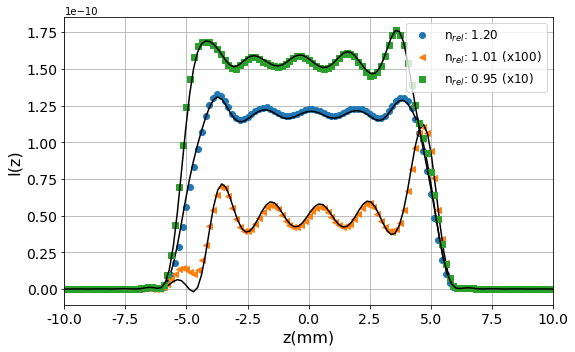

In [14]:
# LIP Frozen Wave longitudinal forces
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

emtdata = pd.read_csv('EMTheoryData.csv', index_col=0)
factor = 11.0

ptc = SphericalParticle()
ptc.radius = 20e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -2*L/10,
          'stop': 2*L/10,
          'num': 80,}

ptc.refractive_index = 1.2*1.33
X1, F1 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot(X1, [1*f for f in F1], 'o', label=label)
plt.plot(emtdata.index, [data*factor for data in emtdata['120']], color='k')

ptc.refractive_index = 1.01*1.33
X2, F2 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f (x100)' % (ptc.refractive_index/1.33)
plt.plot(X2, [100*f for f in F2], '<', label=label)
plt.plot(emtdata.index, [data*factor*100 for data in emtdata['101']], color='k')

ptc.refractive_index = 0.95*1.33
X3, F3 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f (x10)' % (ptc.refractive_index/1.33)
plt.plot(X3, [10*f for f in F3], 's', label=label)
plt.plot(emtdata.index, [data*factor*10 for data in emtdata['095']], color='k')

plt.xlim([-0.2*L, 0.2*L])

xlocs, xlabs = plt.xticks()
plt.xticks(xlocs, [xl*1e3 for xl in xlocs])

plt.legend(fontsize=12, loc=1)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel(r'z(mm)', fontsize=16)
plt.ylabel('I(z)', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-const-longit-forces.png')

plt.show()